name: Milene Carmes Vallejo

last updated: 1/23/2023

# Sales predictions


# Project Description

We are going to use a dataset from https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/. It is a sales prediction for food sold in various stores.

The goal of this project is to help the retailer better understand which products and what factors influence increasing sales.

# Data Dictionary

![sales_predictions](https://github.com/MileneCV/sales_predictions/blob/main/Picture1.png?raw=1)

# Import libraries

In [126]:

import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
set_config(display='diagram')
import matplotlib.pyplot as plt
from matplotlib import legend
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

## saving variables for next lesson/notebook
import joblib

# Loading Data

In [2]:
filename = r"C:\Users\esnak\OneDrive\Desktop\coding_dojo\sales_predictions.csv"
df_sales = pd.read_csv(filename)

df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Prepare/clean the data

## Display Rows and Column Count

In [3]:
df_sales.shape
print(f'There are {df_sales.shape[0]} rows, and {df_sales.shape[1]} columns.')
print(f'The rows represent {df_sales.shape[0]} observations, and the columns represent {df_sales.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


## Display Column Names, Count of Non-Null Values, and Data Types

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Duplicated Data

In [5]:
check_duplicate = df_sales.duplicated().sum()
if check_duplicate == 0:
  print('no duplicate were found to be dropped.')
else:
  print(f'(there are {check_duplicate} duplicates')

no duplicate were found to be dropped.


## Missing Values

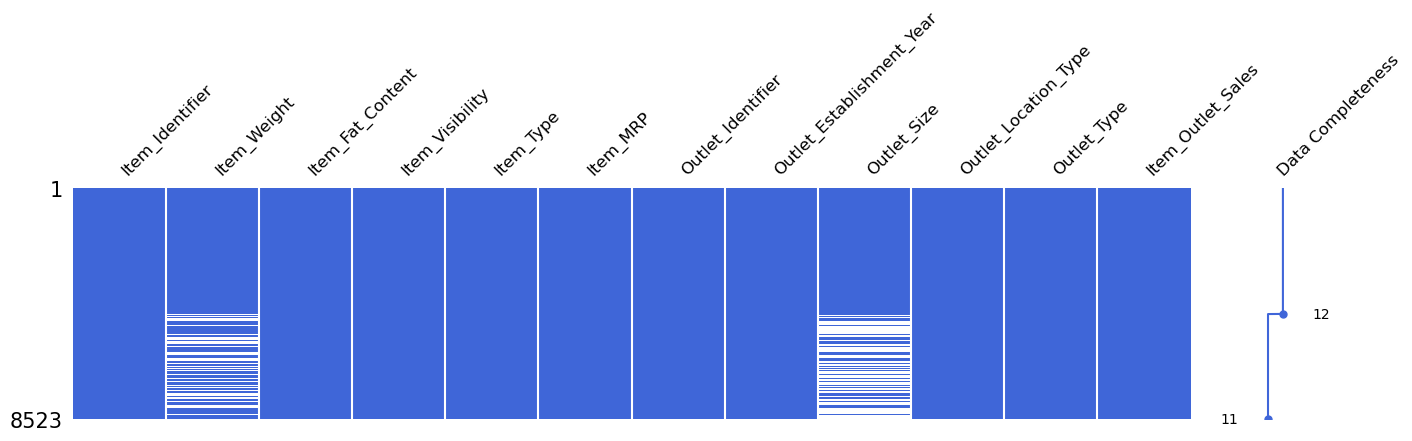

In [6]:
msno.matrix(df_sales, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=	(.25,.4,.85));

In [7]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Identifying % of missing data
df_sales.isna().sum()/len(df_sales)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

17% of item_weight column is missing but we can some of them with item_identifier : all identical 'Item_Identifier' should have the same 'Item_Weight'

### Item_Identifier column

In [9]:
# check 'Item_Identifier'
df_sales['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
# display nan in Item_weight column
nan_weight = df_sales[df_sales['Item_Weight'].isna()]
nan_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [11]:
# create a new dataframe only with Item_Identifier and Item_Weight
df_ident_weight = df_sales[['Item_Identifier', 'Item_Weight']]
df_ident_weight

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
8518,FDF22,6.865
8519,FDS36,8.380
8520,NCJ29,10.600
8521,FDN46,7.210


In [12]:
# drop nan from filter
df_ident_weight = df_ident_weight.dropna()
df_ident_weight 
# now we know all weight for each item_identifier 

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
8518,FDF22,6.865
8519,FDS36,8.380
8520,NCJ29,10.600
8521,FDN46,7.210


In [13]:
# Lets merge df_ident_weight and df_sales
result = pd.merge(df_sales, df_ident_weight, on= 'Item_Identifier', how='inner')
result

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
2,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
3,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
4,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,NCW30,5.21,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.21
41529,NCW05,20.25,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.25
41530,NCW05,20.25,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.25
41531,NCW05,20.25,Low Fat,0.148373,Health and Hygiene,108.8938,OUT045,2002,NaN,Tier 2,Supermarket Type1,3644.5892,20.25


In [14]:
# check missing values
result.isna().sum()

Item_Identifier                  0
Item_Weight_x                 6597
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                  12035
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
Item_Weight_y                    0
dtype: int64

In [15]:
# drop column Item_Weight_x with missing values and keep Item_Weight_y  
df_sales1 = result.drop(columns='Item_Weight_x')
df_sales1.isna().sum()

Item_Identifier                  0
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                  12035
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
Item_Weight_y                    0
dtype: int64

In [16]:
# set item_identifier as index
df_sales1.set_index('Item_Identifier')

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
Item_Identifier,,,,,,,,,,,
FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
...,...,...,...,...,...,...,...,...,...,...,...
NCW30,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.21
NCW05,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.25
NCW05,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.25


In [17]:
# drop duplicates
df_sales = df_sales1.drop_duplicates()
# check duplicates
df_sales.duplicated().sum()

0

In [18]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_y                   0
dtype: int64

### Outlet_Size column

In [19]:
# Let's try to find some clues  to fill missing values
df_sales.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                          [Small]
                   Tier 3                            [nan]
Supermarket Type1  Tier 1                  [Medium, Small]
                   Tier 2                     [nan, Small]
                   Tier 3                           [High]
Supermarket Type2  Tier 3                         [Medium]
Supermarket Type3  Tier 3                         [Medium]
Name: Outlet_Size, dtype: object

There are missing values in Outlet_Location_Type tier 3 but we are unable to find some clues. Let's replace Nan with 'Unknown'

In [20]:
df_sales['Outlet_Size'].fillna('Unknown',inplace=True)

In [21]:
# Confirm that there are no missing values after addressing them.
df_sales.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_y                0
dtype: int64

## Find and fix any inconsistent categories of data
Check for common syntax errors, typos or inconsistencies in strings that need to be fixed.

In [22]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 41531
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Fat_Content           8519 non-null   object 
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Outlet_Size                8519 non-null   object 
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
 10  Item_Outlet_Sales          8519 non-null   float64
 11  Item_Weight_y              8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


### Object columns

In [23]:
# this code will fiter out the object type columns and creates a list of each of column names as an index
df_sales_types = df_sales.dtypes
str_cols = df_sales_types[df_sales_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [24]:
# This for loop prints out each column name and then lists each category
# in the column along with the counts of each category
for col in str_cols:
  print(f'- {col}:')
  print(df_sales[col].value_counts(dropna=False))
  print('\n')

- Item_Identifier:
FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64


- Item_Fat_Content:
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT013    932
OUT027    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926


In [25]:
# something is wrong with "Item_fat_content"
# replace to be 2 type : Low Fat and Regular
# Define a dictionary with key/value pairs and use it to replace values
dict = {"low fat": 'Low Fat', "reg": 'Regular', "LF": 'Low Fat'}
df_sales.replace({'Item_Fat_Content': dict}, inplace = True)

In [26]:
# check 'Item_Fat_Content'
df_sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Numeric columns

In [27]:
# Obtain the summary statistics of each (min, max, mean).
df_sales.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_y
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,0.066112,141.010019,1997.837892,2181.188779,12.875420
std,0.051586,62.283594,8.369105,1706.511093,4.646098
min,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,0.026983,93.844900,1987.000000,834.247400,8.785000
50%,0.053925,143.047000,1999.000000,1794.331000,12.650000
75%,0.094558,185.676600,2004.000000,3100.630600,16.850000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000


No unusual statistics were noted.

## Exploratory Data Analysis

### object columns

In [28]:
# select categorical columns
df_sales_types = df_sales.dtypes
str_cols = df_sales_types[df_sales_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
# Create a function to plot all string columns
def plot_bar_all_features(df1,x):
  fig, ax = plt.subplots(figsize=(8,5))
  counts_x = df1[x].value_counts()
  print(f'Value_counts {x}')
  print(counts_x)
  print('\n', '\n')
  counts_x.plot(kind='barh')
 
  ax.set_title(f'Frequencies of {x}', fontsize = 20, fontweight = 'bold');
  ax.set_ylabel(f'Categories for {x}', fontsize = 15, fontweight = 'bold')
  ax.set_xlabel('Counts', fontsize = 15, fontweight = 'bold')

Value_counts Item_Fat_Content
Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

 



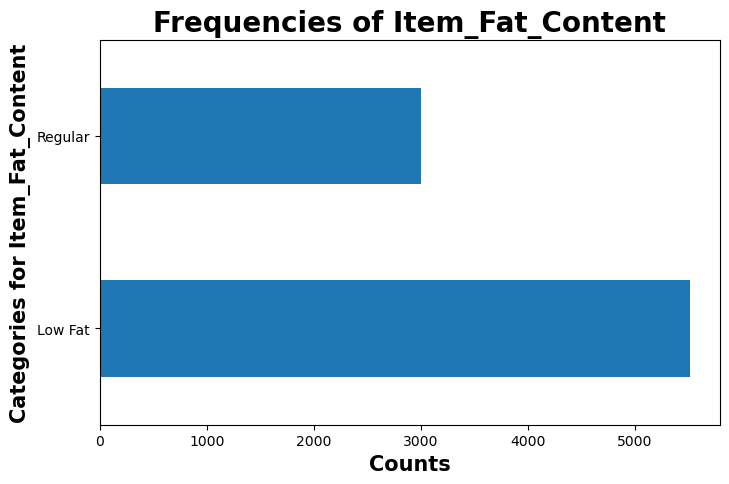

In [30]:
plot_bar_all_features(df_sales, 'Item_Fat_Content')

Value_counts Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 



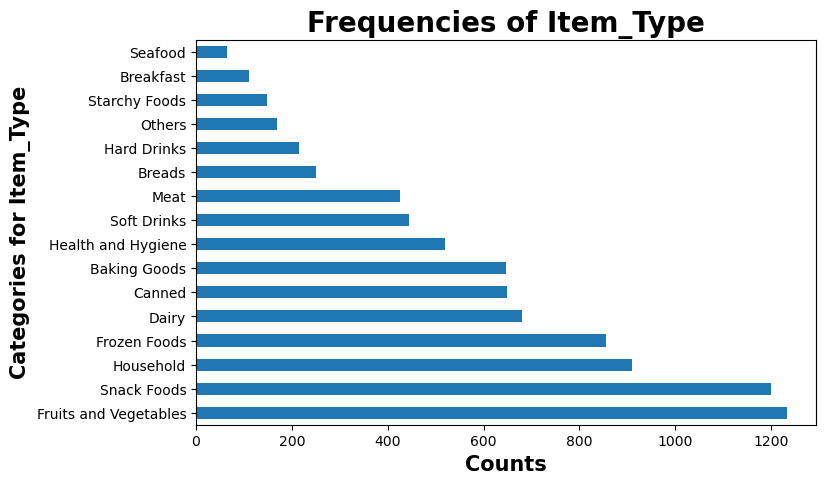

In [31]:
plot_bar_all_features(df_sales, 'Item_Type')

n this dataset there are more fruit/vegetables and snack foods(about 1200) and less sea food and breakfast (about 100).

Value_counts Outlet_Establishment_Year
1985    1459
1987     932
1999     930
2004     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

 



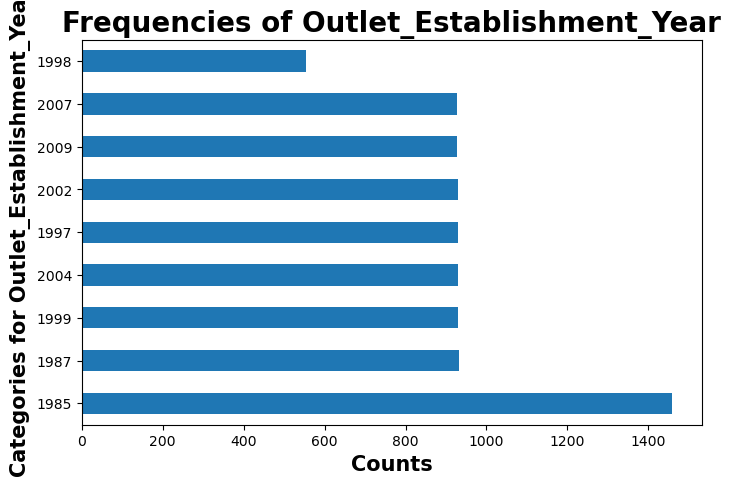

In [32]:
plot_bar_all_features(df_sales, 'Outlet_Establishment_Year')

Value_counts Outlet_Size
Medium     2790
Unknown    2410
Small      2387
High        932
Name: Outlet_Size, dtype: int64

 



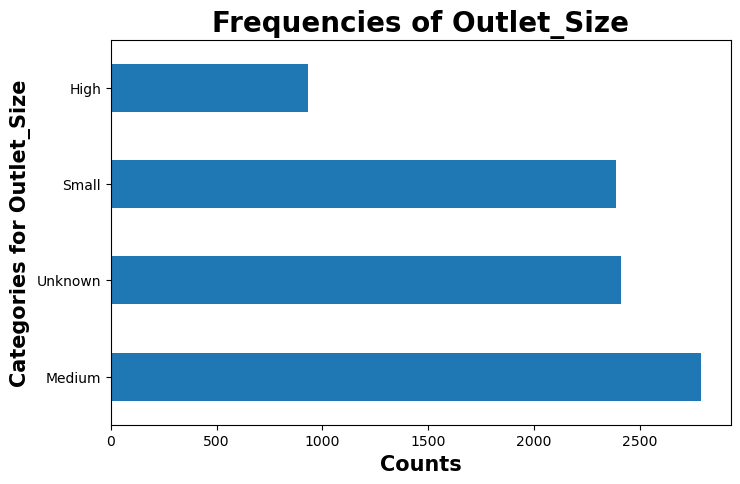

In [33]:
plot_bar_all_features(df_sales, 'Outlet_Size')

Value_counts Outlet_Location_Type
Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

 



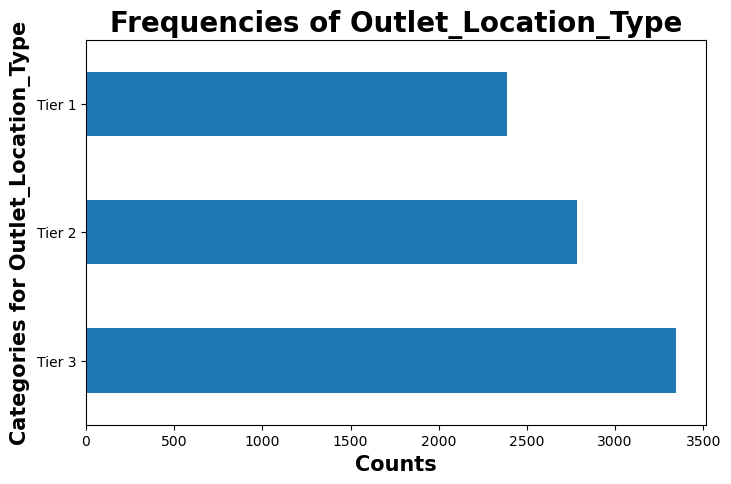

In [34]:
plot_bar_all_features(df_sales, 'Outlet_Location_Type')

Value_counts Outlet_Type
Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

 



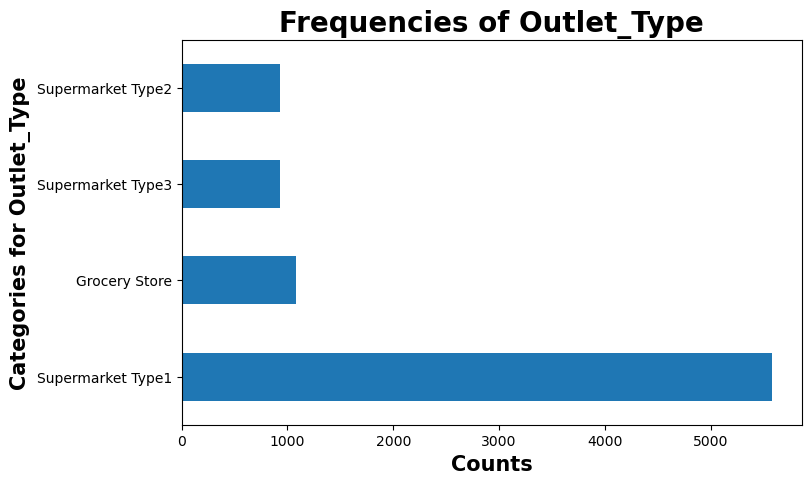

In [35]:
plot_bar_all_features(df_sales, 'Outlet_Type')

### numeric columns

In [36]:
df_sales.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_y
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,0.066112,141.010019,1997.837892,2181.188779,12.875420
std,0.051586,62.283594,8.369105,1706.511093,4.646098
min,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,0.026983,93.844900,1987.000000,834.247400,8.785000
50%,0.053925,143.047000,1999.000000,1794.331000,12.650000
75%,0.094558,185.676600,2004.000000,3100.630600,16.850000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000


In [37]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0], bins = 100)
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[0].legend()

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'Distribution of {col}', fontsize = 20, fontweight = 'bold')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

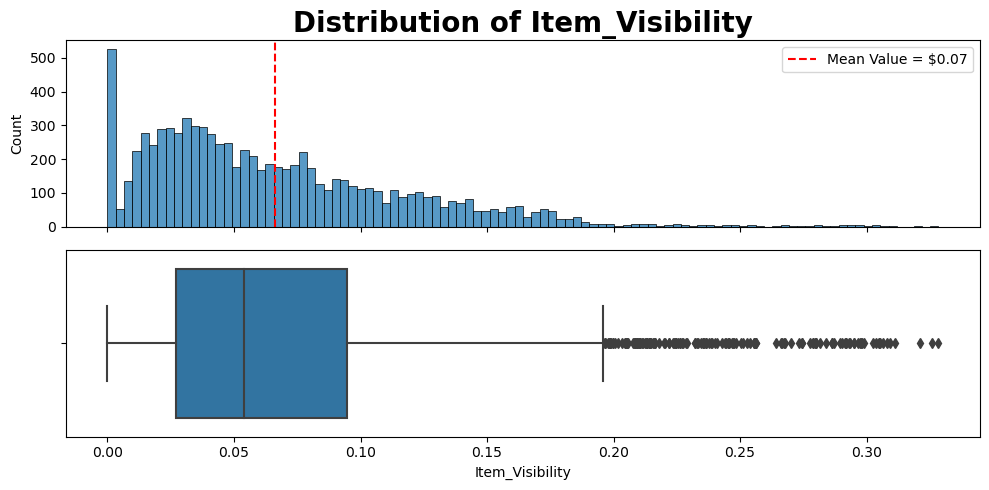

In [38]:
plot_numeric(df_sales,'Item_Visibility')

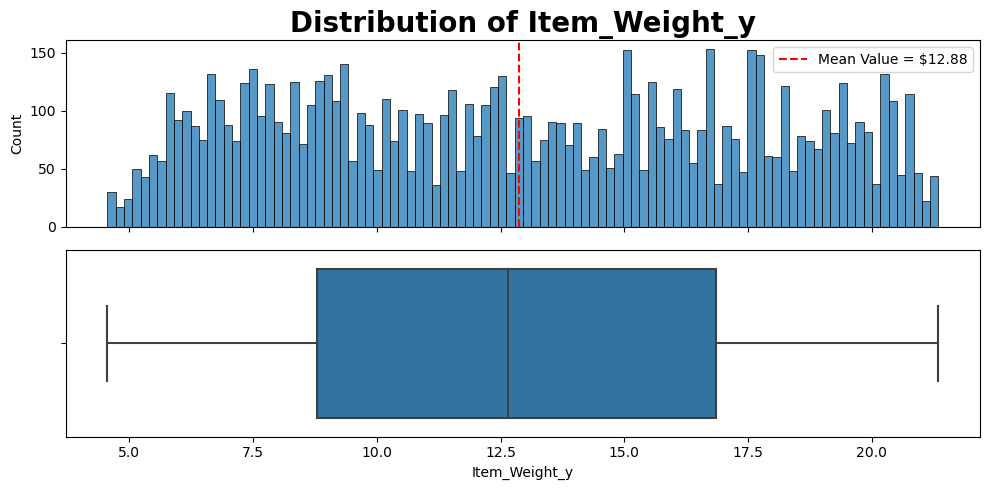

In [39]:
plot_numeric(df_sales,'Item_Weight_y')

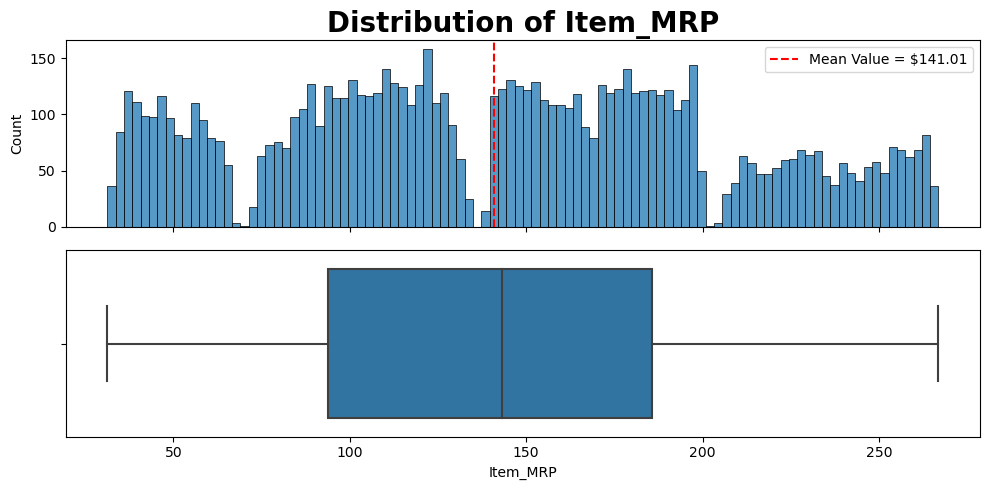

In [40]:
plot_numeric(df_sales,'Item_MRP')

Most of the products have a price between ₹30 and ₹190. The mean price is ₹141.01 and the maximun valor is about ₹260

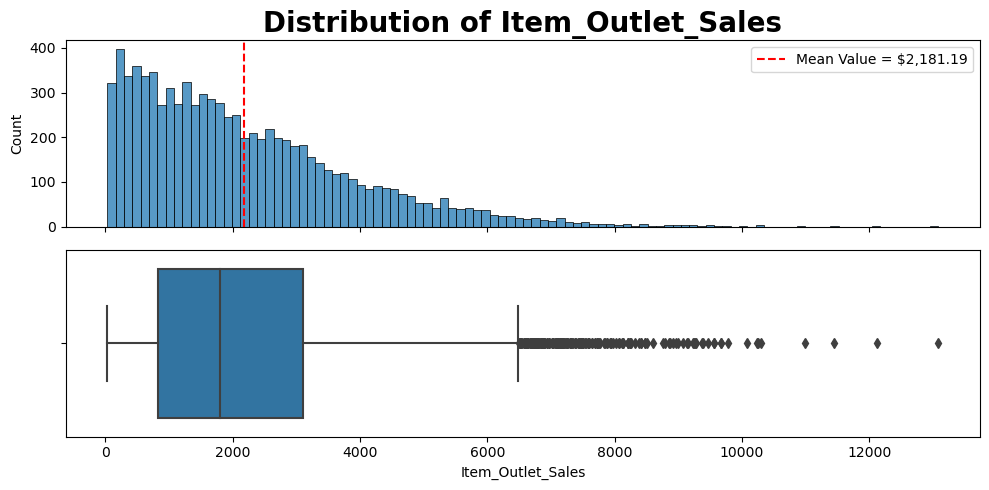

In [41]:
plot_numeric(df_sales,'Item_Outlet_Sales')

### Correlation Heatmap

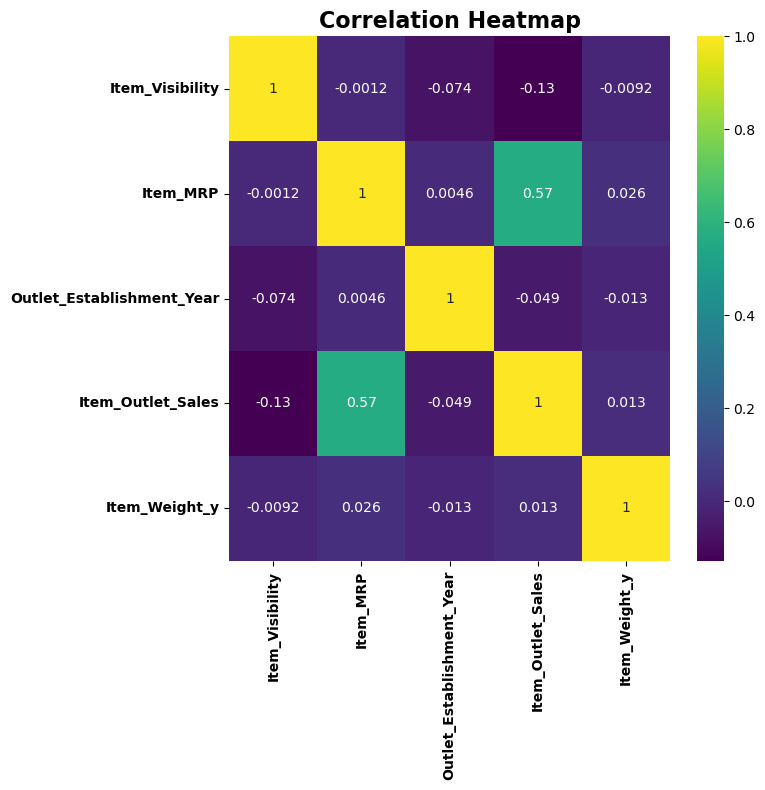

In [42]:
plt.figure(figsize = (8, 8))

corr = df_sales.corr()
sns.heatmap(corr, cmap='viridis', annot=True);

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

#### Observation:

Item MRP has the highest correlation to Item Outlet Sales

## Explanatory Data Analysis

### Correlation between price and sales

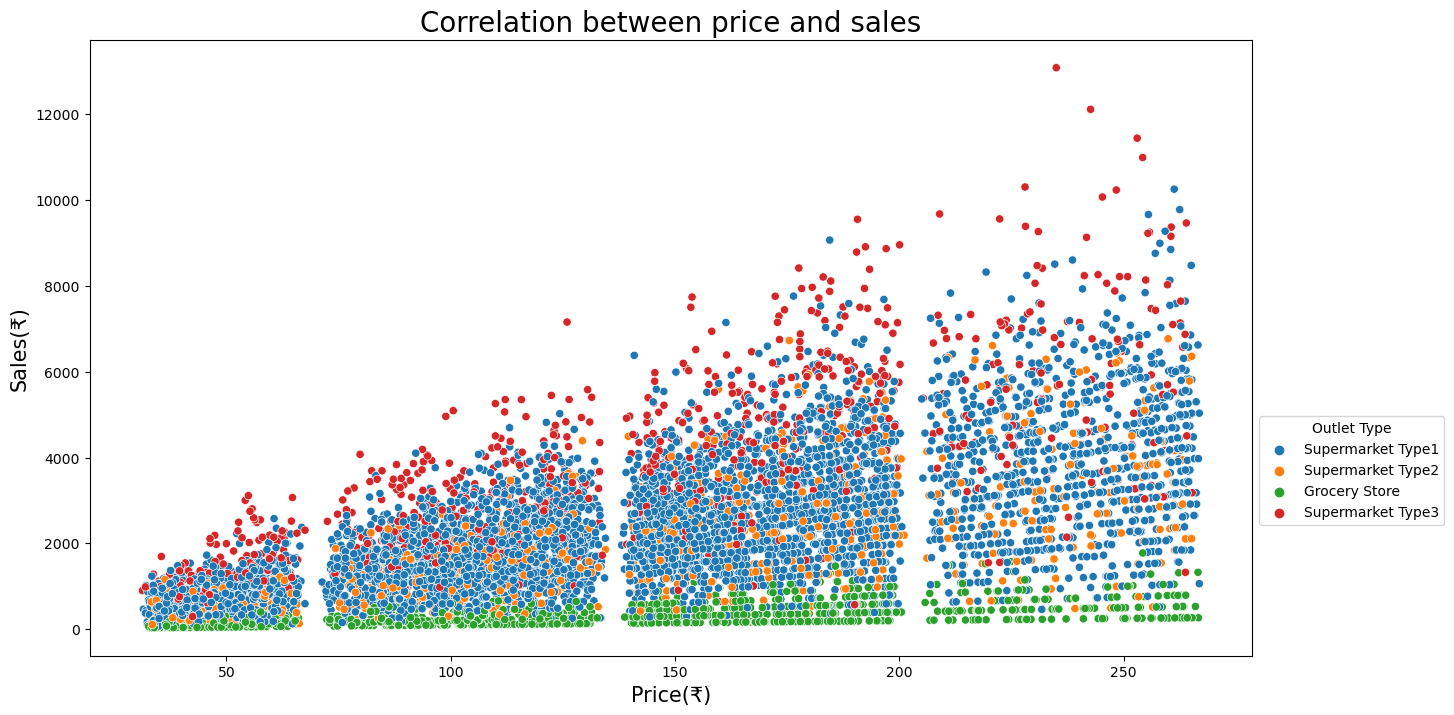

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_sales, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.title('Correlation between price and sales', fontsize=20)
plt.ylabel('Sales(₹)', fontsize=15)
plt.xlabel('Price(₹)', fontsize=15)

plt.legend(bbox_to_anchor=(1,0.4), title = 'Outlet Type')

plt.show()

In supermarket type 1, 2 and 3 there is a positive correlation between price and sales number. In grocery store is hard to see this correlation.

### Which Items generate the greatest amount of sales?

In [44]:
top_selling_item_types = df_sales.groupby('Item_Type')['Item_Outlet_Sales'].sum()
df_top = pd.DataFrame(top_selling_item_types).sort_values('Item_Outlet_Sales', ascending = False)
df_top

,Item_Outlet_Sales
Item_Type,
Fruits and Vegetables,2.820060e+06
Snack Foods,2.728352e+06
Household,2.055494e+06
Frozen Foods,1.824165e+06
Dairy,1.519141e+06
Canned,1.444151e+06
Baking Goods,1.265405e+06
Health and Hygiene,1.045200e+06
Meat,9.175656e+05


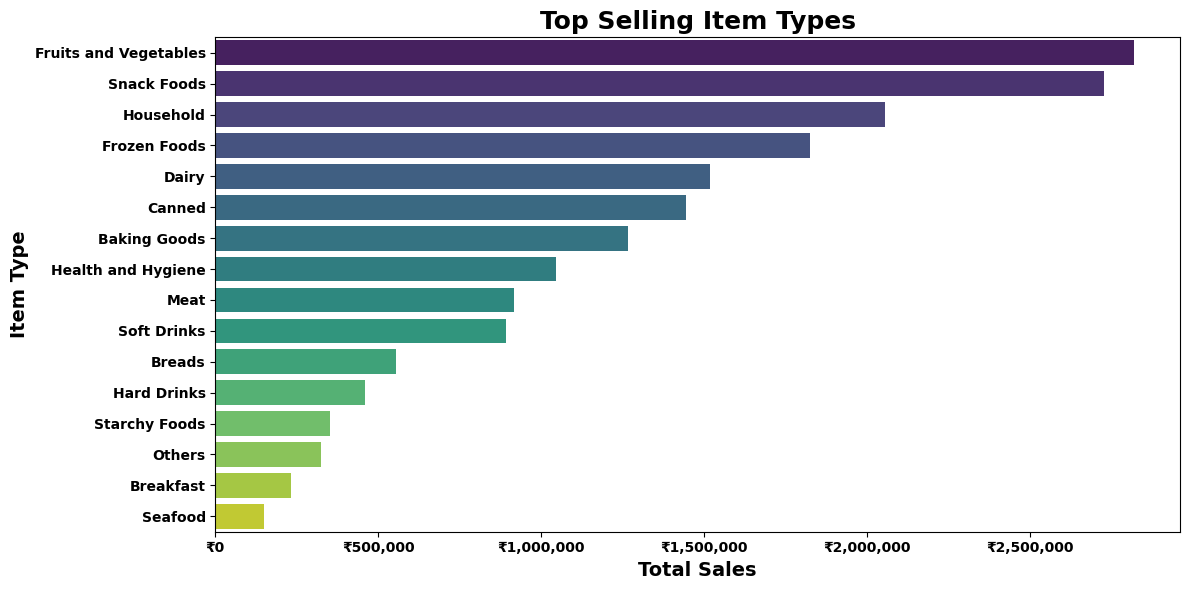

In [45]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=df_top, x='Item_Outlet_Sales', y=df_top.index, orient='h', palette='viridis'); 

plt.title('Top Selling Item Types', fontsize = 18, weight='bold')
plt.xlabel('Total Sales', fontsize = 14, weight='bold')
plt.ylabel('Item Type', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show;

Fruits and Vegetables and snack foods are the top selling item with more than ₹2,500,00 in sales.

### Which outlet has better sales?

In [46]:
# check outlet with better sales 
df_group_type_outlet = df_sales.groupby(['Outlet_Type', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales')
df_group_type_outlet

,Outlet_Type,Outlet_Identifier,Item_Outlet_Sales
1,Grocery Store,OUT019,1.795736e+05
0,Grocery Store,OUT010,1.883402e+05
8,Supermarket Type2,OUT018,1.851823e+06
5,Supermarket Type1,OUT045,2.036725e+06
6,Supermarket Type1,OUT046,2.118395e+06
2,Supermarket Type1,OUT013,2.142664e+06
3,Supermarket Type1,OUT017,2.167465e+06
7,Supermarket Type1,OUT049,2.183970e+06
4,Supermarket Type1,OUT035,2.268123e+06
9,Supermarket Type3,OUT027,3.444468e+06


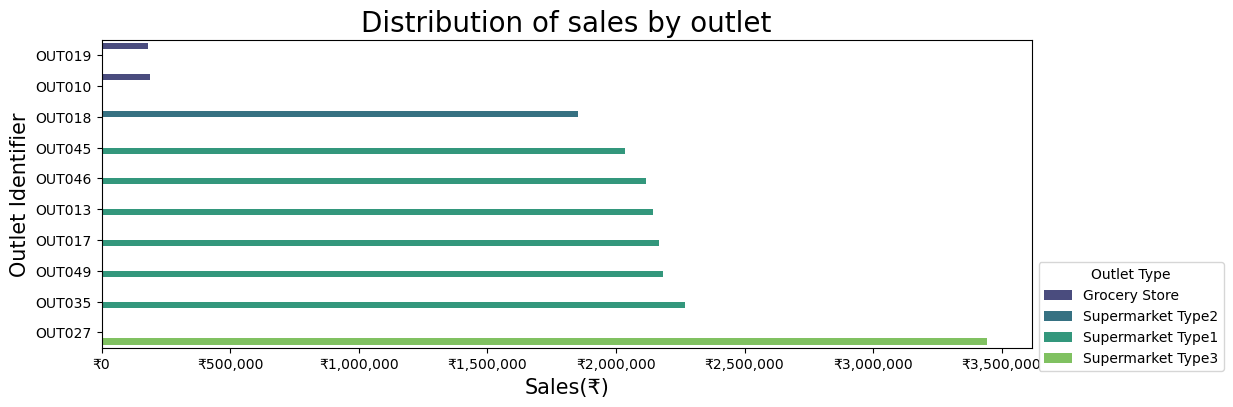

In [47]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=df_group_type_outlet, x='Item_Outlet_Sales', y='Outlet_Identifier', hue='Outlet_Type', palette='viridis', order=df_group_type_outlet['Outlet_Identifier'])
plt.legend(bbox_to_anchor=(1,0.3), title= 'Outlet Type' )
plt.title('Distribution of sales by outlet', fontsize=20)
plt.xlabel('Sales(₹)', fontsize=15)
plt.ylabel('Outlet Identifier', fontsize=15)
ax.xaxis.set_major_formatter(price_fmt)
plt.show()

The outlet OUT027, wich is a supermarket type 3, has better sales than other outlets. Grocery stores OUT010, OUT019 have lower sales. Supermarket Type1 contributed significantly of total sales

### Which outlet type has better sales?

In [48]:
# check outlet type with better sales 
df_group_type = df_sales.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales')
df_group_type

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.679138e+05
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.444468e+06
1,Supermarket Type1,1.291734e+07


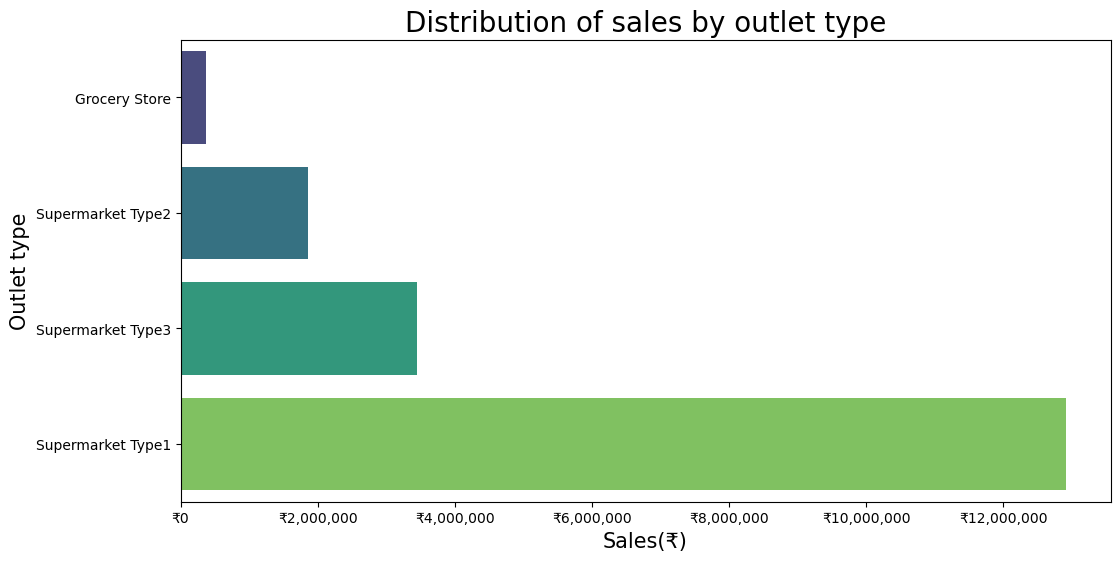

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=df_group_type, x='Item_Outlet_Sales', y='Outlet_Type', palette='viridis')

plt.title('Distribution of sales by outlet type', fontsize=20)
plt.xlabel('Sales(₹)', fontsize=15)
plt.ylabel('Outlet type', fontsize=15)
ax.xaxis.set_major_formatter(price_fmt)

Supermarket Type1 has higher total sales.

### Does Location affect Sales?

In [50]:
location_sales_sorted = df_sales.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales')
location_sales_sorted

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.481939e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.627295e+06


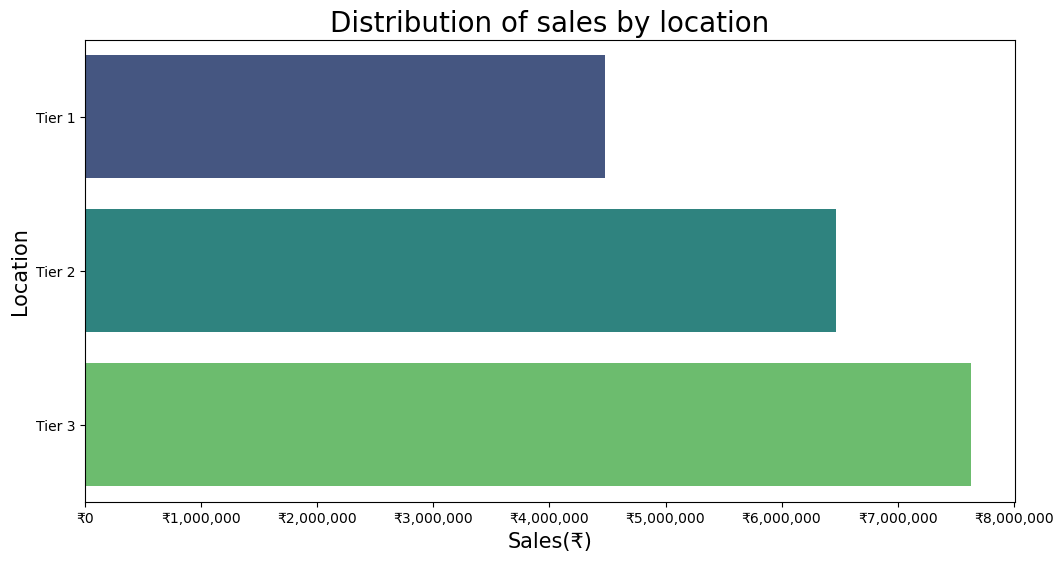

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=location_sales_sorted, x='Item_Outlet_Sales', y='Outlet_Location_Type', palette='viridis')
plt.title('Distribution of sales by location', fontsize=20)
plt.xlabel('Sales(₹)', fontsize=15)
plt.ylabel('Location', fontsize=15)
ax.xaxis.set_major_formatter(price_fmt)

Tier 3 Outlet Location has higher sales.

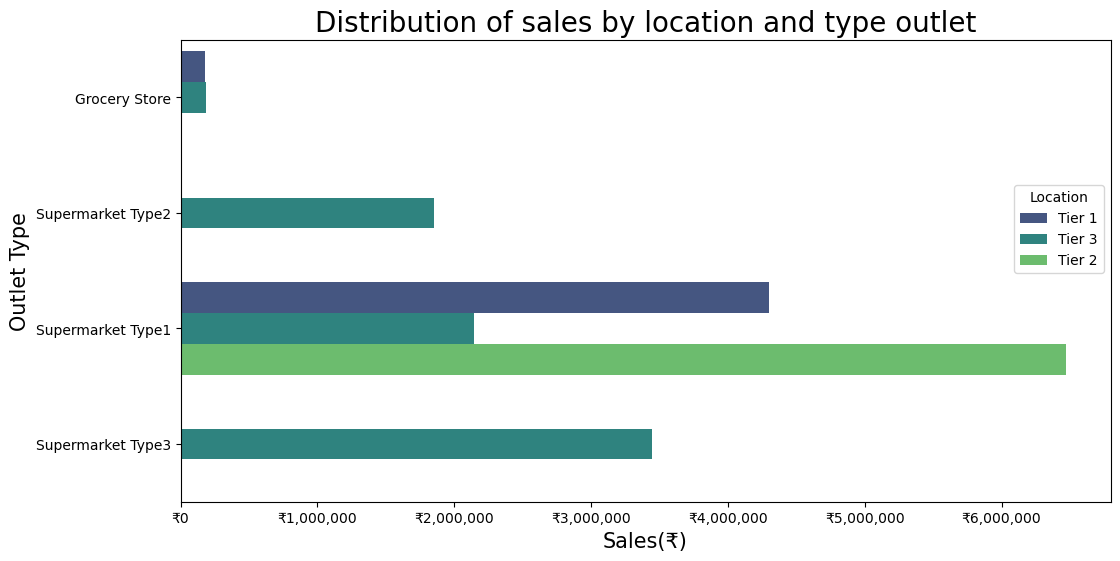

In [52]:
# check what type of outlet are in tier 3 
location_sales_sorted = df_sales.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales')
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=location_sales_sorted, x='Item_Outlet_Sales', y='Outlet_Type', hue= 'Outlet_Location_Type', palette='viridis')
plt.title('Distribution of sales by location and type outlet', fontsize=20)
plt.xlabel('Sales(₹)', fontsize=15)
plt.ylabel('Outlet Type', fontsize=15)
plt.legend(bbox_to_anchor=(1,0.7), title= 'Location')
ax.xaxis.set_major_formatter(price_fmt)

plt.show()

The type of the area in which the store is located is not related to better sales. Because at Tier 3 are located Supermarket type 3 with better sales and grocery store with lower sales. Supermarket type 1 are located in all tier and there is no sales difference.

### Does the year in which store was established is related with better sales?

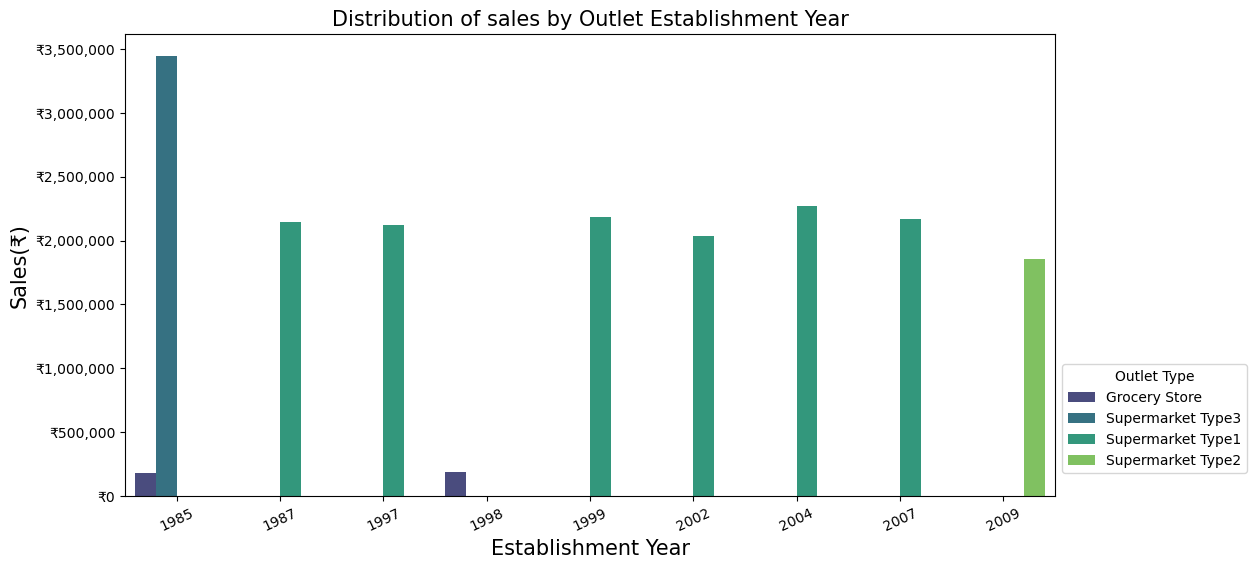

In [53]:
# check if The year in which store was established is related with better sales. 
year_sales = df_sales.groupby(['Outlet_Establishment_Year', 'Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Outlet_Establishment_Year')
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=year_sales, y='Item_Outlet_Sales', hue= 'Outlet_Type',  x = 'Outlet_Establishment_Year', palette='viridis')
plt.title('Distribution of sales by Outlet Establishment Year', fontsize=15)
plt.ylabel('Sales(₹)', fontsize=15)
plt.xlabel('Establishment Year', fontsize=15)
plt.legend(bbox_to_anchor=(1,0.3), title= 'Outlet Type')
plt.xticks(rotation = 90)
plt.xticks(rotation = 25)
ax.yaxis.set_major_formatter(price_fmt)
plt.show()

The year in which stores were established is not related to better sales. In 1985 were established Grocery Store with lower sales and Supermarket Type 3 with higher sales numbers.

# Preprocessing for Machine Learning

In [54]:
# load df again for machine learning 
df_ml = pd.read_csv(filename)
df_ml

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [55]:
# fix inconsistencies in 'Item_Fat_Content' column
dict_names = {'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}
df_ml['Item_Fat_Content']. replace(dict_names, inplace = True)
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [56]:
# 'Outlet_Establishment_Year' is a date/time and will be included with categorical features
df_ml['Outlet_Establishment_Year'] = df_ml['Outlet_Establishment_Year'].astype("object")

In [57]:
# check unique values 
df_ml.select_dtypes('object').nunique()

Item_Identifier              1559
Item_Fat_Content                2
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

## Train/Test split
"Item_Outlet_Sales" column as target

In [58]:
# matrix  - drop columns 'Item_Identifier' (this feature will not make any contribution in model building. There are too many unique values 
X = df_ml.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])

# target
y = df_ml['Item_Outlet_Sales']

# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('size of X_train(75% of df_sales)')
print(len(X_train))

X_train.head()

size of X_train(75% of df_sales)
6392


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


## Selector columns

In [59]:
# make column selector :
# numerical columns
num_sel = make_column_selector(dtype_include = 'number')

# categorical columns
cat_sel = make_column_selector(dtype_include = 'object')

In [60]:
cat_sel(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [61]:
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

## Impute any missing values.

In [62]:
# check missing values 
df_ml.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are missing values in numeric column Item_Weight that is float and categorical column Outlet_Size

## Instantiate Transformers : One HotEncoder

In [63]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

## Instantiate Pipelines

In [64]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

## Instantiate ColumnTransformer

In [65]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C4AAE5A250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C4AAF5AEB0>)],
                  verbose_feature_names_out=False)

## Fit in X_train

In [66]:
# Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C4AAE5A250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C4AAF5AEB0>)],
                  verbose_feature_names_out=False)

## Get feature names out

In [67]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishme

## Remaking Our X_train and X_test as DataFrames with the New Feature Names

In [68]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.35,0.029565,256.4646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,15.25,0.000000,179.7660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,12.35,0.158716,157.2946,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.30,0.026300,79.4302,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,7.93,0.071136,42.7086,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,14.50,0.041313,42.0454,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

7503    1743.0644
2957     356.8688
7031     377.5086
Name: Item_Outlet_Sales, dtype: float64

## Inspect the Result

In [71]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_df).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_df).sum().sum(), 'missing values in testing data')
print('\n')
print('shape of data is', X_train_df.shape)
print('\n')
X_train_df
     

0 missing values in training data
0 missing values in testing data


shape of data is (6392, 51)




,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.350,0.029565,256.4646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,15.250,0.000000,179.7660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,12.350,0.158716,157.2946,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,7.975,0.014628,82.3250,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,19.350,0.016645,120.9098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,0.286345,139.1838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,15.600,0.117575,75.6670,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,17.600,0.018944,237.3590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,20.350,0.054363,117.9466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Processing

## Regression Metric Function

In [72]:
# Create a function to take the true and predicted values
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"Training Data:\nMAE: {mae_train:,.2f} \nMSE: {mse_train:,.2f} \nRMSE: {rmse_train:,.2f} \nR2: {r2_train:.2f}")
        
    print("\n")
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    print(f"Test Data:\nR^2= {mae_test:,.2f} \nMSE: {mse_test:,.2f} \nRMSE: {rmse_test:,.2f} \nR2: {r2_test:.2f}")

## Linear regression model

In [73]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:
MAE: 847.13 
MSE: 1,297,558.14 
RMSE: 1,139.10 
R2: 0.56


Test Data:
R^2= 804.12 
MSE: 1,194,349.72 
RMSE: 1,092.86 
R2: 0.57


The R2 score in test Data was too low, we need drop unnecessary columns, we can change our arguments for our OneHotEncoder in our pipeline and add "drop='if_binary'" or "drop='first'/'last' to automatically drop one of the categories to reduce multicollinearity.

### Extract the coefficients that your model determined.

In [74]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names)

51


51

In [75]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs

Item_Weight                         -1.941817
Item_Visibility                   -423.390180
Item_MRP                            15.720924
Item_Fat_Content_Low Fat           -31.312617
Item_Fat_Content_Regular            31.312617
Item_Type_Baking Goods             -18.612541
Item_Type_Breads                   -47.260859
Item_Type_Breakfast                 26.748523
Item_Type_Canned                     8.903654
Item_Type_Dairy                   -124.947555
Item_Type_Frozen Foods             -20.383167
Item_Type_Fruits and Vegetables     27.141489
Item_Type_Hard Drinks               -4.717641
Item_Type_Health and Hygiene         8.412873
Item_Type_Household                -13.102794
Item_Type_Meat                     -30.477427
Item_Type_Others                   -45.426266
Item_Type_Seafood                  308.888596
Item_Type_Snack Foods              -40.544933
Item_Type_Soft Drinks              -58.098276
Item_Type_Starchy Foods             23.476324
Outlet_Identifier_OUT010          

In [76]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                         -1.941817
Item_Visibility                   -423.390180
Item_MRP                            15.720924
Item_Fat_Content_Low Fat           -31.312617
Item_Fat_Content_Regular            31.312617
Item_Type_Baking Goods             -18.612541
Item_Type_Breads                   -47.260859
Item_Type_Breakfast                 26.748523
Item_Type_Canned                     8.903654
Item_Type_Dairy                   -124.947555
Item_Type_Frozen Foods             -20.383167
Item_Type_Fruits and Vegetables     27.141489
Item_Type_Hard Drinks               -4.717641
Item_Type_Health and Hygiene         8.412873
Item_Type_Household                -13.102794
Item_Type_Meat                     -30.477427
Item_Type_Others                   -45.426266
Item_Type_Seafood                  308.888596
Item_Type_Snack Foods              -40.544933
Item_Type_Soft Drinks              -58.098276
Item_Type_Starchy Foods             23.476324
Outlet_Identifier_OUT010          

### Visualizing Coefficients

In [77]:
# function to get coefficients
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

In [78]:
# function to plot
def plot_coeffs(coeffs, top_n=None,  figsize=(10,5), intercept=False,  intercept_name = "intercept",annotate=False, ha='left',va='center', size=12, xytext=(4,0), textcoords='offset points'):
  """Plots the top_n coefficients from a Series, with optional annotations."""
# Drop intercept if intercept=False and 
  if (intercept==False) & ( intercept_name in coeffs.index):
    coeffs = coeffs.drop(intercept_name)
  if top_n==None:
    ## sort all features and set title
    plot_vals = coeffs#.sort_values()
    title = "All Coefficients - Ranked by Magnitude"
  else:
    ## rank the coeffs and select the top_n
    coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
    top_n_features = coeff_rank.head(top_n)
## sort features and keep top_n and set title
    plot_vals = coeffs.loc[top_n_features.index].sort_values()
    title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    ## annotating bar values 
  if annotate==True:
    annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    return ax

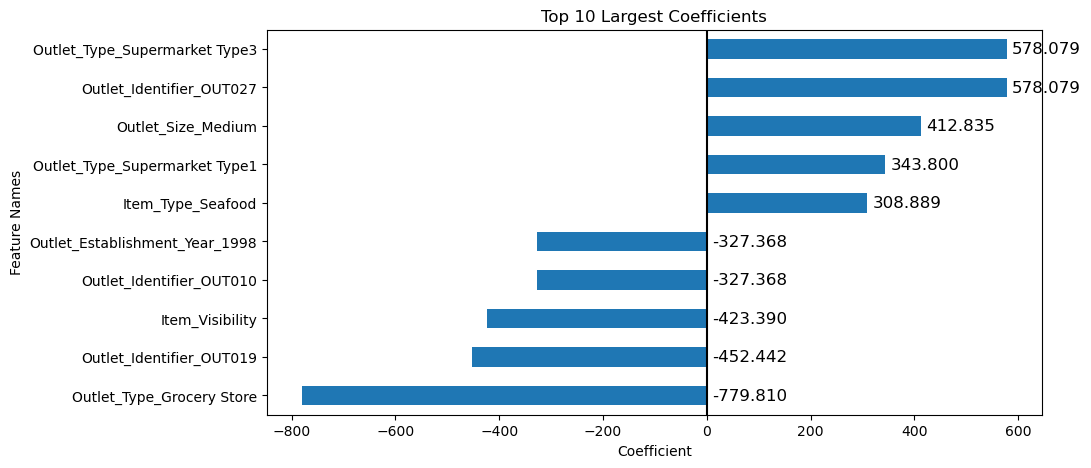

In [79]:
plot_coeffs(coeffs, top_n=10, annotate=True);

### Interpreting Model's Coefficients

#### Coefficients that Positively Influence the predicted sales:

Outlet_Location_Type_Tier 3: Being in the Location_Type_Tier 3 increases the predicted sales by 578.079.

Outlet_Identifier_OUT027: Being the Outlet # OUT027 increases the predicted sales by 578.079.

Outlet_Size_Medium: Being the Outlet of medium size increases the predicted sales by 412.835.

Outlet_Type_Supermarket Type1: Being the Outlet of Supermarket Type1 increases the predicted sales by 343.800.

Item_Type_Seafood: Sell seafood increase the predicted sales by 308.889

#### Coefficients that Negatively Influencethe the predicted sales:

Outlet_Type_Grocery Store: Being a Grocery store subtracted 779.810 from the predicted sales.

Outlet_Identifier_OUT019: Being the Outlet # OUT019 decreases the predicted sales by 452.442.

Item_Visibility: low visibility decrease the predicted sales by 423.390.

Outlet_Identifier_OUT010: Being the Outlet # OUT010 decreases the predicted sales by 327.368.

Outlet_Establishment_Year_1998: if the store was established in 1998 decreases the predicted sales by 327.368

## Randon Forest

In [83]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_df,y_train)
evaluate_regression(rf, X_train_df, y_train, X_test_df, y_test)

Training Data:
MAE: 297.21 
MSE: 183,760.91 
RMSE: 428.67 
R2: 0.94


Test Data:
R^2= 763.32 
MSE: 1,207,807.45 
RMSE: 1,099.00 
R2: 0.56


It is overfitting, we can try to tunne it

### Tune RandomForest

In [84]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [86]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

42

In [89]:
n_ests = list(range(2,43)) 
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
  rf_9_tunned = RandomForestRegressor(max_depth=n, random_state=42)
  tree_reg_pipe_rf = make_pipeline(preprocessor, rf_9_tunned)
  tree_reg_pipe_rf.fit(X_train_df,y_train)
  train_pred_tree_rf = tree_reg_pipe_rf.predict(X_train_df)
  test_pred_tree_rf = tree_reg_pipe_rf.predict(X_test_df)
  scores2.loc[n, 'Train Score'] = r2_score(y_train, train_pred_tree_rf)
  scores2.loc[n, 'Test Score'] = r2_score(y_test, test_pred_tree_rf)

In [90]:
scores2.sort_values(by='Test Score', ascending=False)

,Test Score,Train Score
5,0.602667,0.610554
6,0.601417,0.624537
7,0.598642,0.643058
8,0.597337,0.665994
4,0.596635,0.595925
9,0.594822,0.692645
10,0.592282,0.721042
11,0.587897,0.750556
12,0.585378,0.779854
13,0.58142,0.807358


In [92]:
# The 'max_depth' with better Testing score was 5 
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train_df, y_train)
evaluate_regression(rf_5, X_train_df, y_train, X_test_df,y_test)

Training Data:
MAE: 755.36 
MSE: 1,152,548.28 
RMSE: 1,073.57 
R2: 0.61


Test Data:
R^2= 728.37 
MSE: 1,096,231.66 
RMSE: 1,047.01 
R2: 0.60


With max_depth= 5 we can see that in training datase R2 score is 60% that is better than default value 55%. But the score is not good, let's try tune the n_estimators.

In [94]:
# by default n_estimators': 100
# let's try another values:
n_ests = [250, 300, 350, 450]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
  rf_5_tunned = RandomForestRegressor(max_depth=5, n_estimators=n)
  tree_reg_pipe_rf = make_pipeline(preprocessor, rf_5_tunned)
  tree_reg_pipe_rf.fit(X_train_df, y_train)
  train_pred_tree_rf = tree_reg_pipe_rf.predict(X_train_df)
  test_pred_tree_rf = tree_reg_pipe_rf.predict(X_test_df)
  scores2.loc[n, 'Train Score'] = r2_score(y_train, train_pred_tree_rf)
  scores2.loc[n, 'Test Score'] = r2_score(y_test, test_pred_tree_rf)


In [95]:
scores2.head()

,Test Score,Train Score
250,0.603035,0.610485
300,0.602981,0.610587
350,0.602814,0.610531
450,0.603002,0.610556


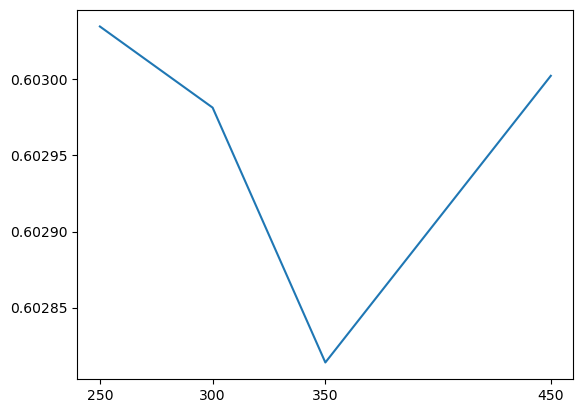

In [96]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

We can see that we didn't improve the score of test dataset with tuning the n_estimators. It is 60%

### Extracting Feature Importances

In [97]:
rf_5.feature_importances_

array([1.72843588e-04, 1.99548331e-03, 5.53899387e-01, 2.62955799e-05,
       2.36513418e-05, 3.37312353e-05, 1.42746379e-05, 2.96109670e-05,
       1.10706154e-05, 7.03872265e-05, 1.30157340e-04, 2.33092945e-04,
       9.78629069e-05, 7.87344491e-05, 1.81393105e-04, 8.99786634e-05,
       2.53934993e-06, 5.61373649e-07, 1.82835048e-05, 1.63960449e-04,
       1.02156143e-04, 9.00772966e-07, 0.00000000e+00, 0.00000000e+00,
       3.10815957e-04, 2.53671119e-07, 4.84358261e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.05804536e-05, 3.85382964e-02,
       2.83051935e-05, 3.51322220e-05, 2.36728732e-06, 0.00000000e+00,
       0.00000000e+00, 2.89516002e-05, 0.00000000e+00, 2.12078031e-04,
       4.85217582e-05, 1.33376177e-06, 0.00000000e+00, 1.86822799e-06,
       1.05742669e-06, 0.00000000e+00, 2.02099790e-06, 3.13943641e-01,
       7.17583320e-04, 1.42895284e-04, 4.01421140e-02])

In [98]:
## Checking the number of feature importances matches the # of columns
print(len(rf_5.feature_importances_))
print(len(X_train_df.columns))
len(rf_5.feature_importances_) == len(X_train_df.columns)

51
51


True

### Saving the importances as a Pandas Series

In [99]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

Item_Weight                        0.052690
Item_Visibility                    0.098527
Item_MRP                           0.440878
Item_Fat_Content_Low Fat           0.005161
Item_Fat_Content_Regular           0.004879
Item_Type_Baking Goods             0.004065
Item_Type_Breads                   0.002469
Item_Type_Breakfast                0.002610
Item_Type_Canned                   0.004183
Item_Type_Dairy                    0.006436
Item_Type_Frozen Foods             0.005661
Item_Type_Fruits and Vegetables    0.007983
Item_Type_Hard Drinks              0.002952
Item_Type_Health and Hygiene       0.004140
Item_Type_Household                0.006355
Item_Type_Meat                     0.003528
Item_Type_Others                   0.001590
Item_Type_Seafood                  0.001703
Item_Type_Snack Foods              0.008118
Item_Type_Soft Drinks              0.005208
Item_Type_Starchy Foods            0.003527
Outlet_Identifier_OUT010           0.000011
Outlet_Identifier_OUT013        

In [100]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=True)
sorted_importance

Outlet_Identifier_OUT019           0.000008
Outlet_Identifier_OUT010           0.000011
Outlet_Establishment_Year_1998     0.000011
Outlet_Establishment_Year_2009     0.001101
Outlet_Type_Supermarket Type2      0.001296
Outlet_Identifier_OUT018           0.001369
Item_Type_Others                   0.001590
Item_Type_Seafood                  0.001703
Outlet_Identifier_OUT013           0.001884
Outlet_Establishment_Year_1987     0.002014
Outlet_Size_High                   0.002101
Outlet_Establishment_Year_1999     0.002156
Outlet_Identifier_OUT049           0.002254
Outlet_Type_Supermarket Type1      0.002379
Item_Type_Breads                   0.002469
Outlet_Identifier_OUT045           0.002515
Outlet_Identifier_OUT017           0.002584
Outlet_Establishment_Year_1997     0.002604
Outlet_Identifier_OUT046           0.002604
Item_Type_Breakfast                0.002610
Outlet_Size_Medium                 0.002711
Outlet_Identifier_OUT035           0.002739
Outlet_Location_Type_Tier 3     

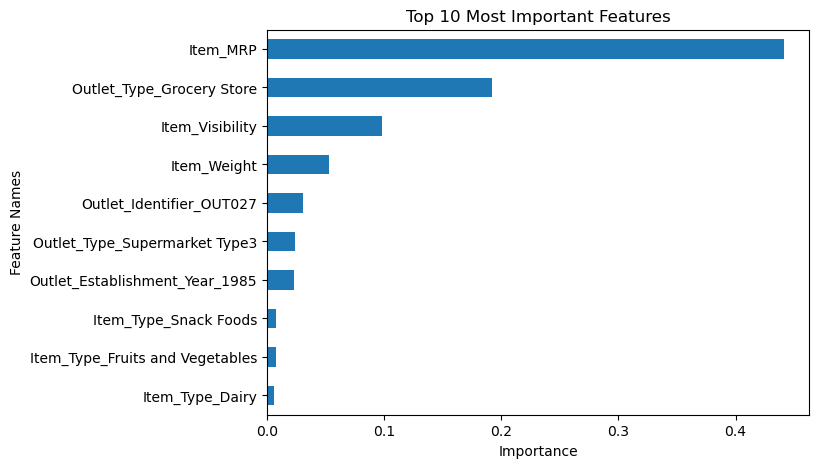

In [105]:
## plotting top 10 importances
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');

or we can just use this function to get importance and plot 

### Remaking Our Model - Using Our Functions

In [101]:
# Create a custom function to get importances:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [102]:
# Create a custom function to plot our importances:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

Training Data:
MAE: 755.36 
MSE: 1,152,548.28 
RMSE: 1,073.57 
R2: 0.61


Test Data:
R^2= 728.37 
MSE: 1,096,231.66 
RMSE: 1,047.01 
R2: 0.60


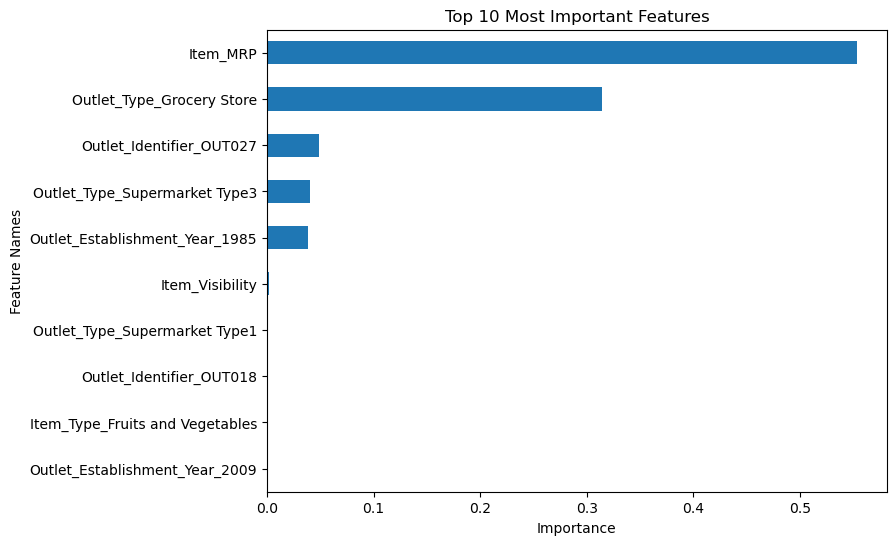

In [104]:
## fit random forest
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train_df,y_train)
evaluate_regression(rf_5, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(rf_5)
plot_importance(importances, top_n=10);

In [107]:
## using the ax to get the fig
fig_ax = ax.get_figure()



### Interpreting feature importances

Item_MRP (price), Outlet_Type_Grocery Store, Outlet_Identifier_OUT027, Outlet_Type_Supermarket Type3  and Outlet_Establishment_Year_1985 were the most important features used by our model. But we do not know the actual relationship between the feature and the target (Item_Outlest_Sales).  

We need to check again rhe Explanatory Data Analysis in the notebook. 

# Decision Tree Regressor

In [108]:
# instantiate a model
dec_tree = DecisionTreeRegressor(random_state = 42)

# put the model in pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

# fit the model on the training data
dec_tree_pipe.fit(X_train_df,y_train)
evaluate_regression(dec_tree_pipe, X_train_df, y_train, X_test_df,y_test)

Training Data:
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00


Test Data:
R^2= 1,059.50 
MSE: 2,412,633.07 
RMSE: 1,553.27 
R2: 0.13


Decision Tree Model is overfit since the score of trainig is 100% and testing is only 13%. Let's try tune

## Tune Decision tree model

In [109]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [110]:
# check max_depth
dec_tree.get_depth()

44

In [111]:
# check how many leaf nodes
dec_tree.get_n_leaves()

6272

In [113]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 44)) # will try every value between 2 and 43
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_df,y_train)
    score = dec_tree.score(X_test_df, y_test)
    r2.append(score)

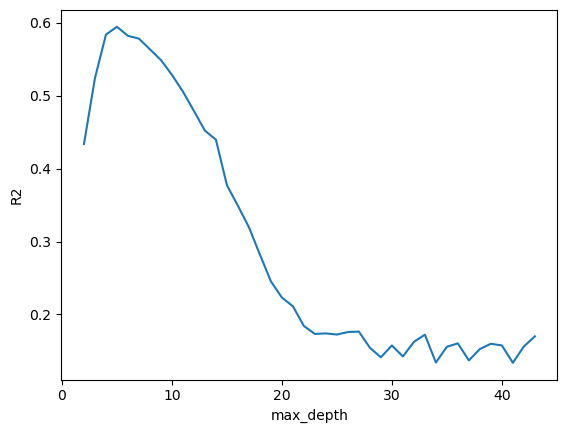

In [114]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

It looks like the best score for the model is when the parameter max_depth is 5.

Training Data:
MAE: 762.61 
MSE: 1,172,122.77 
RMSE: 1,082.65 
R2: 0.60


Test Data:
R^2= 738.32 
MSE: 1,118,185.97 
RMSE: 1,057.44 
R2: 0.59


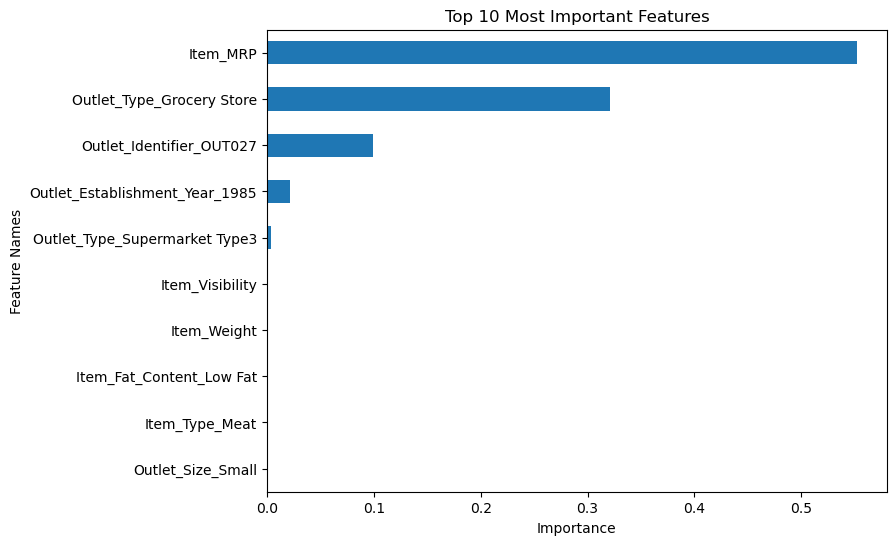

In [115]:
## fit dec tree with 5 max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_df,y_train)
evaluate_regression(dec_tree_5, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(dec_tree_5)
plot_importance(importances, top_n=10);

The result is very similar with Random Forest model. 

# Plot the tree

In [121]:
example_tree =  reg.estimators_[0]
example_tree

DecisionTreeRegressor(max_features=1.0, random_state=1608637542)

In [122]:
# Let's find out how deep it grew. Large trees can be very difficult to visualize in 1 graph.

example_tree.get_depth()

34

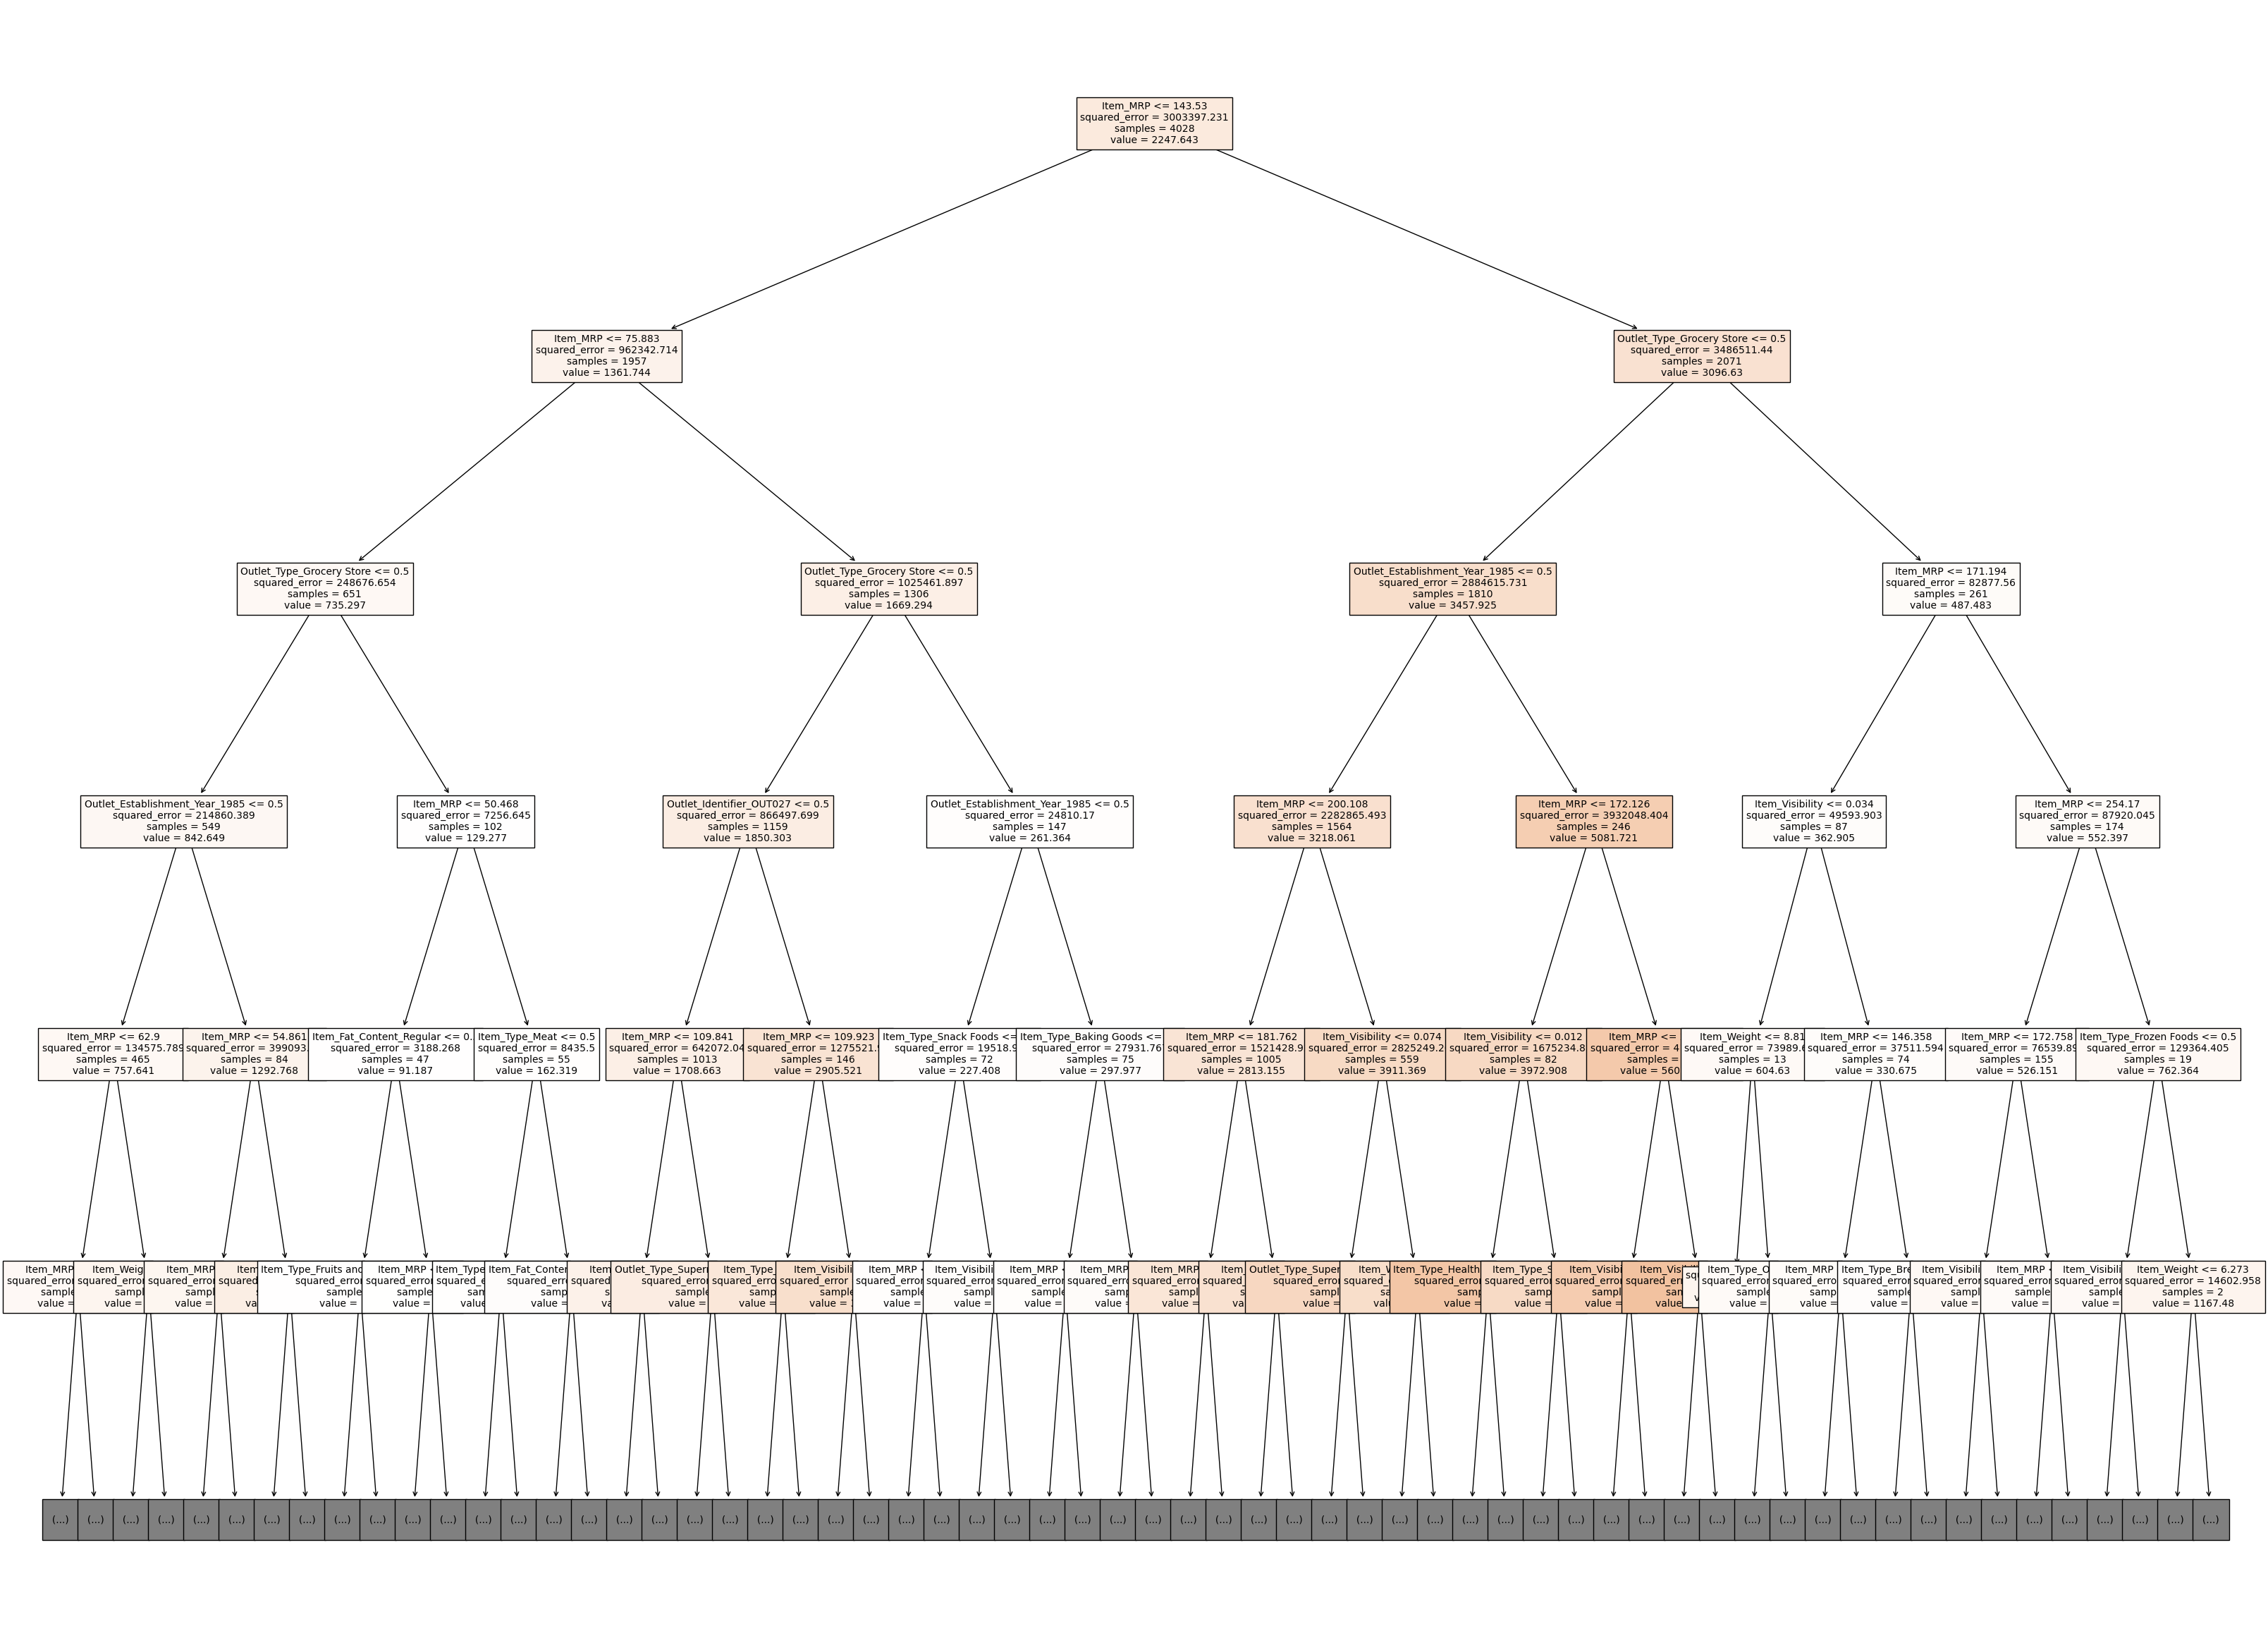

In [124]:
# few layers
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, max_depth=5,filled=True,feature_names=feature_names,ax=ax,
         fontsize=10);

If we examine the decision pathway (which starts at the top-center of the image), we can see that the tree used Item_MRP (price) for many splits early on in the tree.

# Model Comparison

#### Compare the performance of models based on R2.
With the linear regression model, the R2 score in the training dataset was 56%, with the decision tree and random forest model after tunning were 60%.

These scores can be interpreted as saying that the linear regression model can account for about 56% of the variation in y_test using the features in X_test. The decision tree and random forest model can account for about 60% .

#### Compare the performance of models based on MSE.
A lower MSE is better as we want to reduce the size of errors, especially large errors!

The mean of the target is 2095.231046 and if we check MSE in all models were:

1 -linear regression was MSE: 1,198,492.82,

2 - decision tree regressor was 1,057.44

3 - random forest: 1,046.96

The MSE was lower with random forest regression but was too far from the mean target and any model had a score higher than 60%.

Maybe we can improve the score only using the most feature importance.

# Saving & Loading Models (joblib)

In [138]:
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'DecisionTree': dec_tree_5}

joblib.dump(export, 'DecisionTree.joblib')

['DecisionTree.joblib']

In [139]:
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'LinearRegression': lin_reg}
joblib.dump(export, 'LinearRegression.joblib')

['LinearRegression.joblib']

In [140]:
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':rf_5}
joblib.dump(export, 'random_forest_tunned.joblib')

['random_forest_tunned.joblib']

In [141]:
# check
loaded = joblib.load('random_forest_tunned.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])